#### Downloading the csv file

In [119]:
from urllib.request import urlretrieve

""" This is how i should have downloaded the data from a given link, but I already have data
here, in an zip file, I simply need to extract that."""
# india_covid_url = "https://example_india.com"
# urlretrieve(india_covid_url, 'india_covid_daywise.csv')  

' This is how i should have downloaded the data from a given link, but I already have data\nhere, in an zip file, I simply need to extract that.'

#### Creating a file extractor or file reader function

In [120]:
# pip install patool  # a tool to extract winRAR zip file

In [121]:
from pathlib import Path  # to access paths
import patoolib  # to extract zip file
import pandas as pd

def load_data():
    Path("datasets").mkdir(parents=True, exist_ok=True) # creates a directory named datasets, here we will extract our data
    # Checking if the .csv file is already present, if not then only we will run the further code
    if not Path("datasets/StatewiseTestingDetails.csv").is_file():  
        # Using pattol library to exract our winRAR zip file
        patoolib.extract_archive("./covid.zip", outdir="datasets")
    # reading the file using pandas and returning it
    return pd.read_csv(Path("datasets/StatewiseTestingDetails.csv"))

#### Calling the load_data function

In [122]:
covid_in = load_data()

In [123]:
type(covid_in)  # Type of file which we are reading is Dataframe

pandas.core.frame.DataFrame

In [124]:
covid_in  # having a look at our DataFrame

,Date,State,TotalSamples,Negative,Positive
0,17/04/2020,Andaman and Nicobar Islands,1403,NaN,12.0
1,24/04/2020,Andaman and Nicobar Islands,2679,NaN,27.0
2,27/04/2020,Andaman and Nicobar Islands,2848,NaN,33.0
3,01/05/2020,Andaman and Nicobar Islands,3754,NaN,33.0
4,16/05/2020,Andaman and Nicobar Islands,6677,NaN,33.0
...,...,...,...,...,...
16331,06/08/2021,West Bengal,15999961,NaN,NaN
16332,07/08/2021,West Bengal,16045662,NaN,NaN
16333,08/08/2021,West Bengal,16092192,NaN,NaN
16334,09/08/2021,West Bengal,16122345,NaN,NaN


In [125]:
covid_in.info()  # Some info about our DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16336 entries, 0 to 16335
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          16336 non-null  object 
 1   State         16336 non-null  object 
 2   TotalSamples  16336 non-null  int64  
 3   Negative      6967 non-null   float64
 4   Positive      5662 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 638.2+ KB


In [126]:
covid_in.describe()  # Give a list of mathematical terms for columns which have numeric terms

,TotalSamples,Negative,Positive
count,1.633600e+04,6.967000e+03,5.662000e+03
mean,5.376466e+06,1.869149e+06,5.652654e+04
std,8.780338e+06,3.498355e+06,1.673108e+05
min,5.800000e+01,0.000000e+00,0.000000e+00
25%,1.729098e+05,7.652900e+04,5.362500e+02
50%,9.307580e+05,4.221510e+05,4.771000e+03
75%,7.284795e+06,2.071382e+06,3.361875e+04
max,6.789786e+07,8.356103e+07,1.638961e+06


In [127]:
covid_in.columns  # Gives name of headers / columns

Index(['Date', 'State', 'TotalSamples', 'Negative', 'Positive'], dtype='object')

In [128]:
covid_in.shape  # Gives rows and columns count

(16336, 5)

### Important Analogy
Pandas format is simliar to this <br>
``` 
covid_in = {
    'date':       ['2020-08-30', '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03'],
    'new_cases':  [1444, 1365, 996, 975, 1326],
    'new_deaths': [1, 4, 6, 8, 6],
    'new_tests': [53541, 42583, 54395, None, None]
}
```

In [129]:
covid_in["Positive"]  # Extracting a column data

0        12.0
1        27.0
2        33.0
3        33.0
4        33.0
         ... 
16331     NaN
16332     NaN
16333     NaN
16334     NaN
16335     NaN
Name: Positive, Length: 16336, dtype: float64

Each column is represented using a data structure called Series, 
which is essentially a numpy array with some extra methods and properties.

In [130]:
type(covid_in["Positive"])

pandas.core.series.Series

In [131]:
covid_in["Positive"][4]  # 4th index data of covid Positive column

33.0

In [132]:
covid_in["Negative"][4]  # 4th index data of covid Negative column

nan

*Pandas also provides the .at method to retrieve the element at a specific row & column directly*

In [133]:
covid_in.at[4, 'Positive']

33.0

In [134]:
covid_in.at[4, "Negative"]

nan

*Instead of using the indexing notation [], Pandas also allows accessing columns as properties of the dataframe using the . notation. However, this method only works for columns whose names do not contain spaces or special characters.*

In [135]:
covid_in.Positive

0        12.0
1        27.0
2        33.0
3        33.0
4        33.0
         ... 
16331     NaN
16332     NaN
16333     NaN
16334     NaN
16335     NaN
Name: Positive, Length: 16336, dtype: float64

Further we can also pass a list of columns within the indexing notation [] to access a subset of the data frame with just the given columns

In [136]:
cases_in = covid_in[["Date", "TotalSamples"]]
cases_in

,Date,TotalSamples
0,17/04/2020,1403
1,24/04/2020,2679
2,27/04/2020,2848
3,01/05/2020,3754
4,16/05/2020,6677
...,...,...
16331,06/08/2021,15999961
16332,07/08/2021,16045662
16333,08/08/2021,16092192
16334,09/08/2021,16122345


In [137]:
covid_in_copy = covid_in.copy()  # To create a copy of our DataFrame
covid_in_copy

,Date,State,TotalSamples,Negative,Positive
0,17/04/2020,Andaman and Nicobar Islands,1403,NaN,12.0
1,24/04/2020,Andaman and Nicobar Islands,2679,NaN,27.0
2,27/04/2020,Andaman and Nicobar Islands,2848,NaN,33.0
3,01/05/2020,Andaman and Nicobar Islands,3754,NaN,33.0
4,16/05/2020,Andaman and Nicobar Islands,6677,NaN,33.0
...,...,...,...,...,...
16331,06/08/2021,West Bengal,15999961,NaN,NaN
16332,07/08/2021,West Bengal,16045662,NaN,NaN
16333,08/08/2021,West Bengal,16092192,NaN,NaN
16334,09/08/2021,West Bengal,16122345,NaN,NaN


*To access a specific row of data, Pandas provides the .loc method*

In [138]:
covid_in.loc[4]

Date                             16/05/2020
State           Andaman and Nicobar Islands
TotalSamples                           6677
Negative                                NaN
Positive                               33.0
Name: 4, dtype: object

In [139]:
type(covid_in.loc[243])  # It is also a series type

pandas.core.series.Series

*We can use the .head and .tail methods to view the first or last few rows of data.*

In [140]:
covid_in.head(5)

,Date,State,TotalSamples,Negative,Positive
0,17/04/2020,Andaman and Nicobar Islands,1403,NaN,12.0
1,24/04/2020,Andaman and Nicobar Islands,2679,NaN,27.0
2,27/04/2020,Andaman and Nicobar Islands,2848,NaN,33.0
3,01/05/2020,Andaman and Nicobar Islands,3754,NaN,33.0
4,16/05/2020,Andaman and Nicobar Islands,6677,NaN,33.0


In [141]:
covid_in.tail(4)

,Date,State,TotalSamples,Negative,Positive
16332,07/08/2021,West Bengal,16045662,NaN,NaN
16333,08/08/2021,West Bengal,16092192,NaN,NaN
16334,09/08/2021,West Bengal,16122345,NaN,NaN
16335,10/08/2021,West Bengal,16162814,NaN,NaN


Here, we can see some value of Negative and Positive column showing NaN, *The distinction between 0 and NaN is suble but important. In this dataset, it represents that daily Positive and Negative numbers were not reported on specific dates*

* We can find the first index that doesn't contain a NaN value using a column's first_valid_index method.

In [142]:
covid_in.Negative.first_valid_index()  # 453 row has 1st non NaN value of Negative

453

In [143]:
# Let's look around 453th row
covid_in.loc[450:456]

,Date,State,TotalSamples,Negative,Positive
450,07/08/2021,Andaman and Nicobar Islands,450208,NaN,NaN
451,08/08/2021,Andaman and Nicobar Islands,451415,NaN,NaN
452,09/08/2021,Andaman and Nicobar Islands,452587,NaN,NaN
453,02/04/2020,Andhra Pradesh,1800,1175.0,132.0
454,10/04/2020,Andhra Pradesh,6374,6009.0,365.0
455,11/04/2020,Andhra Pradesh,6958,6577.0,381.0
456,12/04/2020,Andhra Pradesh,6958,6553.0,405.0


*We can use the .sample method to retrieve a random sample of rows from the data frame*

In [144]:
covid_in.sample(10)

,Date,State,TotalSamples,Negative,Positive
4517,17/05/2020,Gujarat,143600,132220.0,11380.0
7708,24/01/2021,Kerala,9258401,NaN,890280.0
3826,22/02/2021,Delhi,12014182,NaN,NaN
11860,03/12/2020,Puducherry,414952,373481.0,NaN
2395,27/04/2020,Chandigarh,843,777.0,40.0
15350,09/08/2021,Uttar Pradesh,67691677,NaN,NaN
13183,07/08/2020,Sikkim,29958,NaN,854.0
12023,16/05/2021,Puducherry,926532,814097.0,NaN
2694,02/03/2021,Chandigarh,258184,235319.0,NaN
11511,12/04/2021,Odisha,9400456,NaN,NaN


Here's a summary of the functions & methods we looked at in this section:

* `covid_df['new_cases']` - Retrieving columns as a `Series` using the column name
* `new_cases[243]` - Retrieving values from a `Series` using an index
* `covid_df.at[243, 'new_cases']` - Retrieving a single value from a data frame
* `covid_df.copy()` - Creating a deep copy of a data frame
* `covid_df.loc[243]` - Retrieving a row or range of rows of data from the data frame
* `head`, `tail`, and `sample` - Retrieving multiple rows of data from the data frame
* `covid_df.new_tests.first_valid_index` - Finding the first non-empty index in a series

*Similar to Numpy arrays, a Pandas series supports the sum method to sum up the array*

In [150]:
total_positive = covid_in.Positive.sum()
total_negative = covid_in.Negative.sum()
total_test = covid_in.TotalSamples.sum()

In [153]:
print(f"Total no of +ve Cases is {total_positive}\nTotal no of -ve cases is {total_negative}\nTotal tests: {total_test}")

Total no of +ve Cases is 320053246.0
Total no of -ve cases is 13022364122.0
Total tests: 87829949447


In [196]:
# Positivity rate
pos_rate = total_positive / total_test
print(f"Positivity rate (+): {(pos_rate * 100):.2f}")

Positivity rate (+): 0.36


In [168]:
# Days where there is more than 1000000 +ve cases
high_pos = covid_in.Positive > 1000000  # Returns a Boolean array of True and False
high_pos

0        False
1        False
2        False
3        False
4        False
         ...  
16331    False
16332    False
16333    False
16334    False
16335    False
Name: Positive, Length: 16336, dtype: bool

In [169]:
# print those high_pos days
covid_in[high_pos]

,Date,State,TotalSamples,Negative,Positive
9045,11/09/2020,Maharashtra,5072521,4056840.0,1015681.0
9046,12/09/2020,Maharashtra,5164840,4127075.0,1037765.0
9047,13/09/2020,Maharashtra,5253676,4193368.0,1060308.0
9048,14/09/2020,Maharashtra,5321116,4243742.0,1077374.0
9049,15/09/2020,Maharashtra,5409060,4311204.0,1097856.0
9050,16/09/2020,Maharashtra,5506276,4385055.0,1121221.0
9051,17/09/2020,Maharashtra,5604890,4459050.0,1145840.0
9052,18/09/2020,Maharashtra,5693345,4525849.0,1167496.0
9053,19/09/2020,Maharashtra,5786147,4598132.0,1188015.0
9054,20/09/2020,Maharashtra,5872241,4663599.0,1208642.0


In [182]:
# We can write the above 2 lines in a single line
high_cases = covid_in[covid_in.Positive > 700000]
high_cases

,Date,State,TotalSamples,Negative,Positive
7672,19/12/2020,Kerala,7293518,NaN,700160.0
7673,20/12/2020,Kerala,7347376,NaN,705871.0
7674,21/12/2020,Kerala,7382223,NaN,709294.0
7675,22/12/2020,Kerala,7447052,NaN,715343.0
7676,23/12/2020,Kerala,7508489,NaN,721512.0
...,...,...,...,...,...
9081,17/10/2020,Maharashtra,8069100,6482779.0,1586321.0
9082,18/10/2020,Maharashtra,8139466,6544085.0,1595381.0
9084,20/10/2020,Maharashtra,8251234,6641718.0,1609516.0
9087,23/10/2020,Maharashtra,8479155,NaN,1632544.0


*The above data frame contains `113` rows, but only the first & last five rows are displayed by default with Jupyter for brevity. We can change some display options to view all the rows.*

In [183]:
from IPython.display import display
with pd.option_context("display.max_rows", 120):
    display(covid_in[covid_in.Positive > 700000])

,Date,State,TotalSamples,Negative,Positive
7672,19/12/2020,Kerala,7293518,NaN,700160.0
7673,20/12/2020,Kerala,7347376,NaN,705871.0
7674,21/12/2020,Kerala,7382223,NaN,709294.0
7675,22/12/2020,Kerala,7447052,NaN,715343.0
7676,23/12/2020,Kerala,7508489,NaN,721512.0
7677,24/12/2020,Kerala,7564562,NaN,726689.0
7678,25/12/2020,Kerala,7613415,NaN,732086.0
7679,26/12/2020,Kerala,7649001,NaN,735613.0
7680,27/12/2020,Kerala,7695117,NaN,740518.0
7681,28/12/2020,Kerala,7727986,NaN,743565.0


In [197]:
# Days where positivity rate is higher than the overall positivity rate
high_pos_rate = covid_in[covid_in.Positive / covid_in.TotalSamples > pos_rate]
high_pos_rate

,Date,State,TotalSamples,Negative,Positive,positive_rate
0,17/04/2020,Andaman and Nicobar Islands,1403,NaN,12.0,0.008553
1,24/04/2020,Andaman and Nicobar Islands,2679,NaN,27.0,0.010078
2,27/04/2020,Andaman and Nicobar Islands,2848,NaN,33.0,0.011587
3,01/05/2020,Andaman and Nicobar Islands,3754,NaN,33.0,0.008791
4,16/05/2020,Andaman and Nicobar Islands,6677,NaN,33.0,0.004942
...,...,...,...,...,...,...
15976,16/08/2020,West Bengal,1314772,NaN,116498.0,0.088607
15977,17/08/2020,West Bengal,1347091,NaN,119578.0,0.088768
15978,18/08/2020,West Bengal,1382198,NaN,122753.0,0.088810
15981,21/08/2020,West Bengal,1487844,NaN,132364.0,0.088964


Make a new column of positivity rates

In [198]:
covid_in["positive_rate"] = covid_in.Positive / covid_in.TotalSamples
covid_in

,Date,State,TotalSamples,Negative,Positive,positive_rate
0,17/04/2020,Andaman and Nicobar Islands,1403,NaN,12.0,0.008553
1,24/04/2020,Andaman and Nicobar Islands,2679,NaN,27.0,0.010078
2,27/04/2020,Andaman and Nicobar Islands,2848,NaN,33.0,0.011587
3,01/05/2020,Andaman and Nicobar Islands,3754,NaN,33.0,0.008791
4,16/05/2020,Andaman and Nicobar Islands,6677,NaN,33.0,0.004942
...,...,...,...,...,...,...
16331,06/08/2021,West Bengal,15999961,NaN,NaN,NaN
16332,07/08/2021,West Bengal,16045662,NaN,NaN,NaN
16333,08/08/2021,West Bengal,16092192,NaN,NaN,NaN
16334,09/08/2021,West Bengal,16122345,NaN,NaN,NaN


*For now, let's remove the positive_rate column using the `drop` method.*

In [199]:
covid_in.drop(columns=["positive_rate"], inplace=True)

In [200]:
covid_in

,Date,State,TotalSamples,Negative,Positive
0,17/04/2020,Andaman and Nicobar Islands,1403,NaN,12.0
1,24/04/2020,Andaman and Nicobar Islands,2679,NaN,27.0
2,27/04/2020,Andaman and Nicobar Islands,2848,NaN,33.0
3,01/05/2020,Andaman and Nicobar Islands,3754,NaN,33.0
4,16/05/2020,Andaman and Nicobar Islands,6677,NaN,33.0
...,...,...,...,...,...
16331,06/08/2021,West Bengal,15999961,NaN,NaN
16332,07/08/2021,West Bengal,16045662,NaN,NaN
16333,08/08/2021,West Bengal,16092192,NaN,NaN
16334,09/08/2021,West Bengal,16122345,NaN,NaN


#### Sorting Rows using Column values

In [204]:
covid_in.sort_values("Positive", ascending=False).head(7)  # Highest to Lowest +ve cases

,Date,State,TotalSamples,Negative,Positive
9088,24/10/2020,Maharashtra,8548036,NaN,1638961.0
9087,23/10/2020,Maharashtra,8479155,NaN,1632544.0
9084,20/10/2020,Maharashtra,8251234,6641718.0,1609516.0
9082,18/10/2020,Maharashtra,8139466,6544085.0,1595381.0
9081,17/10/2020,Maharashtra,8069100,6482779.0,1586321.0
9080,16/10/2020,Maharashtra,7989693,6413631.0,1576062.0
9079,15/10/2020,Maharashtra,7914651,6350036.0,1564615.0


In [207]:
covid_in.sort_values("TotalSamples", ascending=False).head(7)  # Highest to lowest test conducted

,Date,State,TotalSamples,Negative,Positive
15351,10/08/2021,Uttar Pradesh,67897856,NaN,NaN
15350,09/08/2021,Uttar Pradesh,67691677,NaN,NaN
15349,08/08/2021,Uttar Pradesh,67476221,NaN,NaN
15348,07/08/2021,Uttar Pradesh,67221784,NaN,NaN
15347,06/08/2021,Uttar Pradesh,66967783,NaN,NaN
15346,05/08/2021,Uttar Pradesh,66717749,NaN,NaN
15345,04/08/2021,Uttar Pradesh,66463922,NaN,NaN


#### Working with Dates

In [208]:
covid_in.Date

0        17/04/2020
1        24/04/2020
2        27/04/2020
3        01/05/2020
4        16/05/2020
            ...    
16331    06/08/2021
16332    07/08/2021
16333    08/08/2021
16334    09/08/2021
16335    10/08/2021
Name: Date, Length: 16336, dtype: object

*The data type of date is currently `object`, so `Pandas` does not know that this column is a date. We can convert it into a `datetime` column using the `pd.to_datetime` method.*

In [214]:
covid_in.Date = pd.to_datetime(covid_in.Date)  # Changing dtype from object to datetime64

In [215]:
covid_in.Date

0       2020-04-17
1       2020-04-24
2       2020-04-27
3       2020-01-05
4       2020-05-16
           ...    
16331   2021-06-08
16332   2021-07-08
16333   2021-08-08
16334   2021-09-08
16335   2021-10-08
Name: Date, Length: 16336, dtype: datetime64[ns]

*We can see that it now has the datatype `datetime64`. We can now extract different parts of the data into separate columns, using the `DatetimeIndex` class.*

In [217]:
covid_in['year'] = pd.DatetimeIndex(covid_in.Date).year
covid_in['month'] = pd.DatetimeIndex(covid_in.Date).month
covid_in['day'] = pd.DatetimeIndex(covid_in.Date).day
covid_in['weekday'] = pd.DatetimeIndex(covid_in.Date).weekday

In [218]:
covid_in

,Date,State,TotalSamples,Negative,Positive,year,month,day,weekday
0,2020-04-17,Andaman and Nicobar Islands,1403,NaN,12.0,2020,4,17,4
1,2020-04-24,Andaman and Nicobar Islands,2679,NaN,27.0,2020,4,24,4
2,2020-04-27,Andaman and Nicobar Islands,2848,NaN,33.0,2020,4,27,0
3,2020-01-05,Andaman and Nicobar Islands,3754,NaN,33.0,2020,1,5,6
4,2020-05-16,Andaman and Nicobar Islands,6677,NaN,33.0,2020,5,16,5
...,...,...,...,...,...,...,...,...,...
16331,2021-06-08,West Bengal,15999961,NaN,NaN,2021,6,8,1
16332,2021-07-08,West Bengal,16045662,NaN,NaN,2021,7,8,3
16333,2021-08-08,West Bengal,16092192,NaN,NaN,2021,8,8,6
16334,2021-09-08,West Bengal,16122345,NaN,NaN,2021,9,8,2


In [219]:
# Query the rows for May
covid_in_may = covid_in[covid_in.month == 5]
covid_in_may

,Date,State,TotalSamples,Negative,Positive,year,month,day,weekday
4,2020-05-16,Andaman and Nicobar Islands,6677,NaN,33.0,2020,5,16,5
5,2020-05-19,Andaman and Nicobar Islands,6965,NaN,33.0,2020,5,19,1
6,2020-05-20,Andaman and Nicobar Islands,7082,NaN,33.0,2020,5,20,2
7,2020-05-21,Andaman and Nicobar Islands,7167,NaN,33.0,2020,5,21,3
8,2020-05-22,Andaman and Nicobar Islands,7263,NaN,33.0,2020,5,22,4
...,...,...,...,...,...,...,...,...,...
16263,2021-05-30,West Bengal,12372134,NaN,NaN,2021,5,30,6
16264,2021-05-31,West Bengal,12430977,NaN,NaN,2021,5,31,0
16269,2021-05-06,West Bengal,12789625,NaN,NaN,2021,5,6,3
16299,2021-05-07,West Bengal,14470472,NaN,NaN,2021,5,7,4


In [220]:
# Extract the subset of columns to be aggregated
covid_in_may_metrics = covid_in_may[['Positive', 'Negative', 'TotalSamples']]
covid_in_may_metrics

,Positive,Negative,TotalSamples
4,33.0,NaN,6677
5,33.0,NaN,6965
6,33.0,NaN,7082
7,33.0,NaN,7167
8,33.0,NaN,7263
...,...,...,...
16263,NaN,NaN,12372134
16264,NaN,NaN,12430977
16269,NaN,NaN,12789625
16299,NaN,NaN,14470472


In [222]:
# Get the column-wise sum
covid_may_totals = covid_in_may_metrics.sum()
covid_may_totals

Positive        1.946010e+07
Negative        1.343389e+09
TotalSamples    9.971741e+09
dtype: float64

In [223]:
# Writing above 3 lines code in a single line
covid_in[covid_in.month == 5][['Positive', 'Negative', 'TotalSamples']].sum()

Positive        1.946010e+07
Negative        1.343389e+09
TotalSamples    9.971741e+09
dtype: float64

*Aggregating columns using the `.mean` method.*

In [224]:
# Overall TotalSamples average
covid_in.TotalSamples.mean()

5376466.053317825

In [225]:
# Average for Sundays
covid_in[covid_in.weekday == 6].TotalSamples.mean()

5382842.657516892

#### Grouping and aggregation
We can use the `groupby` function to create a group for each month, select the columns we wish to aggregate, and aggregate them using the `sum` method.

In [228]:
covid_in_months = covid_in.groupby("month")[["Positive", "Negative", "TotalSamples"]].sum()
covid_in_months

,Positive,Negative,TotalSamples
month,,,
1,29709528.0,1.032701e+09,6856943733
2,12672483.0,1.075877e+09,6627800260
3,12418847.0,1.101700e+09,7830894648
4,14136693.0,1.205412e+09,8407777251
5,19460104.0,1.343389e+09,9971740548
6,25076970.0,1.417158e+09,10887359194
7,46424679.0,1.547570e+09,12668672966
8,37369856.0,7.058085e+08,3851031531
9,38569595.0,8.119058e+08,4426008053


#### Writing data back to files

In [232]:
result_in = covid_in[["Date", "Positive", "Negative", "TotalSamples", "year"]]  # We will be creating a new csv with these columns only

In [233]:
result_in

,Date,Positive,Negative,TotalSamples,year
0,2020-04-17,12.0,NaN,1403,2020
1,2020-04-24,27.0,NaN,2679,2020
2,2020-04-27,33.0,NaN,2848,2020
3,2020-01-05,33.0,NaN,3754,2020
4,2020-05-16,33.0,NaN,6677,2020
...,...,...,...,...,...
16331,2021-06-08,NaN,NaN,15999961,2021
16332,2021-07-08,NaN,NaN,16045662,2021
16333,2021-08-08,NaN,NaN,16092192,2021
16334,2021-09-08,NaN,NaN,16122345,2021


In [236]:
result_in.to_csv("./datasets/results.csv", index=None)

### Basic Plotting with Pandas
We generally use a library like `matplotlib` or `seaborn` plot graphs within a Jupyter notebook. However, Pandas dataframes & series provide a handy `.plot` method for quick and easy plotting.

<Axes: >

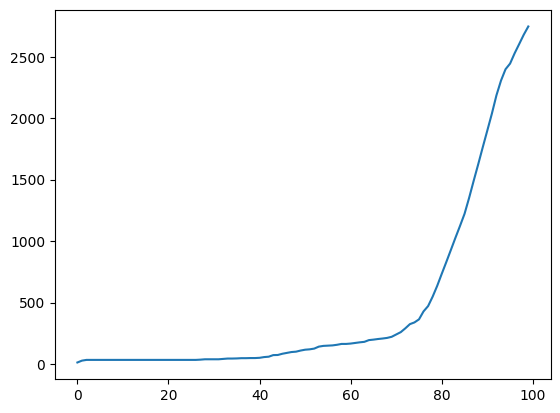

In [239]:
result_in.Positive.head(100).plot()  # First 100 days Positivity plot

<Axes: xlabel='Date'>

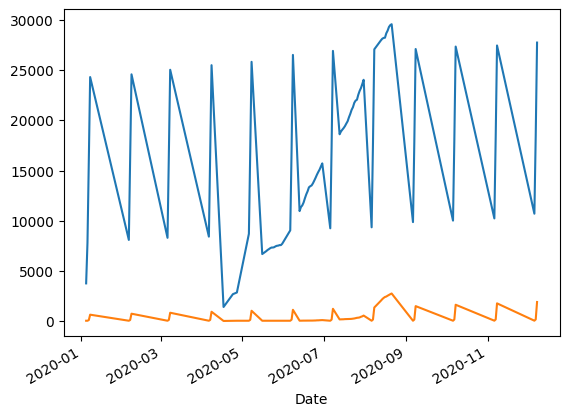

In [260]:
# Positive vs TotalSamples for first 100 days
result_in.TotalSamples.head(100).plot()
result_in.Positive.head(100).plot()

<Axes: title={'center': 'Postivity Rate'}, xlabel='Date'>

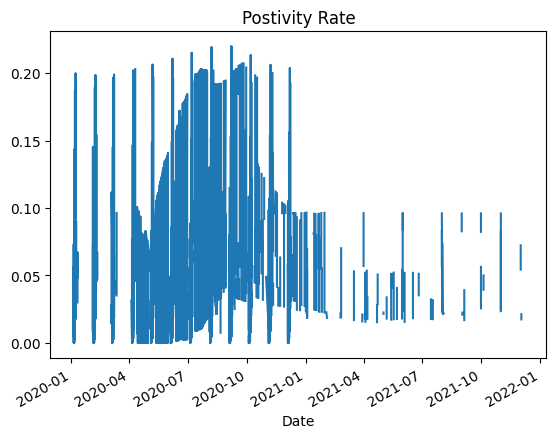

In [265]:
positivity = result_in.Positive / result_in.TotalSamples
positivity.plot(title="Postivity Rate")

<Axes: xlabel='month'>

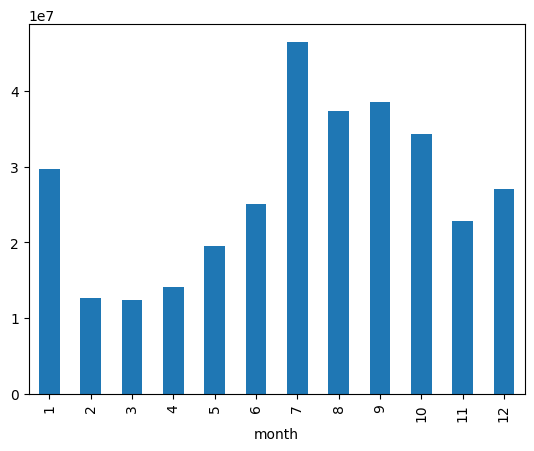

In [267]:
covid_in_months.Positive.plot(kind="bar") # Monthwise poitive cases bar graph

### Good Job `WASIF`! End of Pandas Practise